# Transfer Learning Using VGG-19 on Malaria Disease Detection 

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
IMAGE_SIZE = [224,224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [4]:
# Below [3] is the RGB channel along with the image size
# The meaning of include_top=False is that itt will cut the first and last layer of the model. 
#Here in the first layer we will provvide the image size whereas in the last layer we have two classes.
vgg19 = VGG19(input_shape = IMAGE_SIZE+[3], weights = 'imagenet',include_top=False)

In [5]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# Don't train the existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
# Calculating the total number of output class
folders = glob('Dataset/Train/*')
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
# Our layers - We can add as per our convenience
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders),activation='softmax')(x)

#Create a model object
model = Model(inputs=vgg19.input,outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Provide the same traget size as initialized for the image size
training_set = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 416 images belonging to 2 classes.


In [14]:
training_set

In [15]:
test_set = test_datagen.flow_from_directory(
    'Dataset/Test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 134 images belonging to 2 classes.


In [16]:
# Fit the model
malaria_detection_model = model.fit(
    training_set,
    validation_data=test_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/30
13/13 [==============================] - 102s 8s/step - loss: 1.3491 - accuracy: 0.5240 - val_loss: 0.8008 - val_accuracy: 0.5000
Epoch 2/30
13/13 [==============================] - 96s 8s/step - loss: 0.7249 - accuracy: 0.6466 - val_loss: 0.6161 - val_accuracy: 0.6791
Epoch 3/30
13/13 [==============================] - 95s 7s/step - loss: 0.5055 - accuracy: 0.7356 - val_loss: 0.5961 - val_accuracy: 0.7239
Epoch 4/30
13/13 [==============================] - 97s 8s/step - loss: 0.3398 - accuracy: 0.8750 - val_loss: 0.4494 - val_accuracy: 0.7836
Epoch 5/30
13/13 [==============================] - 96s 8s/step - loss: 0.3095 - accuracy: 0.8798 - val_loss: 0.4011 - val_accuracy: 0.8134
Epoch 6/30
13/13 [==============================] - 97s 8s/step - loss: 0.2826 - accuracy: 0.8966 - val_loss: 0.3639 - val_accuracy: 0.8582
Epoch 7/30
13/13 [==============================] - 96s 8s/step - loss: 0.2732 - accuracy: 0.8990 - val_loss: 0.3363 - val_accuracy: 0.8881
Epoch 8/30
13/13 [=

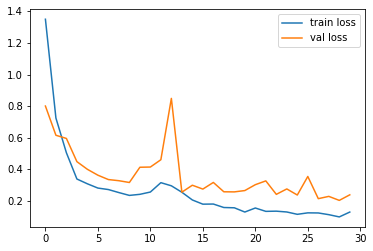

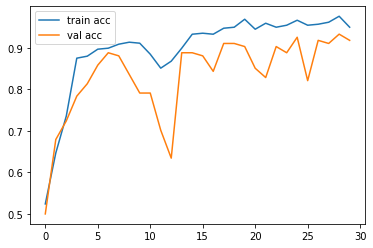

In [17]:
#Plot the loss
plt.plot(malaria_detection_model.history['loss'],label='train loss')
plt.plot(malaria_detection_model.history['val_loss'],label='val loss')
plt.legend()
plt.show()

#Plot the accuracy
plt.plot(malaria_detection_model.history['accuracy'],label='train acc')
plt.plot(malaria_detection_model.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

In [18]:
#Save the model

from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [19]:
y_pred = model.predict(test_set)
y_pred

array([[5.47533296e-02, 9.45246696e-01],
       [9.98805046e-01, 1.19490176e-03],
       [6.04652405e-01, 3.95347565e-01],
       [9.99981642e-01, 1.82998410e-05],
       [9.84829247e-01, 1.51707288e-02],
       [8.90077174e-01, 1.09922804e-01],
       [1.13458477e-01, 8.86541486e-01],
       [9.65216756e-01, 3.47833112e-02],
       [2.75160700e-01, 7.24839330e-01],
       [9.95495677e-01, 4.50426852e-03],
       [7.94460595e-01, 2.05539376e-01],
       [5.23760438e-01, 4.76239622e-01],
       [9.98270869e-01, 1.72906276e-03],
       [1.40354028e-02, 9.85964537e-01],
       [1.81026578e-01, 8.18973422e-01],
       [9.99997735e-01, 2.21862342e-06],
       [8.92628372e-01, 1.07371606e-01],
       [9.60170805e-01, 3.98291536e-02],
       [8.41212332e-01, 1.58787638e-01],
       [5.79152219e-02, 9.42084730e-01],
       [6.37435839e-02, 9.36256349e-01],
       [6.32952094e-01, 3.67047906e-01],
       [6.70413747e-02, 9.32958663e-01],
       [6.11371517e-01, 3.88628423e-01],
       [5.429888

In [20]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model = load_model('model_vgg19.h5')

In [23]:
img = image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [24]:
x.shape

(224, 224, 3)

In [25]:
x=x/255

In [26]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [27]:
model.predict(img_data)

array([[0.00366922, 0.9963308 ]], dtype=float32)

In [28]:
a = np.argmax(model.predict(img_data),axis=1)
if a==1:
    print('Uninfected')
else:
    print('Infected')

Uninfected
